## Reading the Dataset

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('C:\Capstone-1\\uber_nyc_data.csv')

In [3]:
df.head(5) #To read first 5 enteries of dataset

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
0,252581,7C,6A,9/1/2014 9:00,4.25,0:15:11
1,252582,7B,15,9/1/2014 18:00,10.17,0:34:05
2,252583,11,2A,9/1/2014 17:00,4.02,0:17:06
3,252584,3B,4A,9/1/2014 13:00,1.46,0:06:32
4,252585,2A,10,9/1/2014 14:00,8.31,0:26:17


In [4]:
df.shape #Checking No. of rows & columns

(1048575, 6)

## Cleaning Of Data

In [5]:
#Checking whether the dataset is balanced or not. As there were 1048575 entries in excel sheet, 'destination_taz' is the only column 
#with less than that entries. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1048575 non-null  int64  
 1   origin_taz       1048575 non-null  object 
 2   destination_taz  1001011 non-null  object 
 3   pickup_datetime  1048575 non-null  object 
 4   trip_distance    1048575 non-null  float64
 5   trip_duration    1048575 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 48.0+ MB


In [6]:
df.columns[df.isna().any()].tolist() #to check columns with null values

['destination_taz']

In [7]:
df[df.isnull().any(axis=1)]

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
15,252596,6B,NaN,9/1/2014 17:00,11.67,0:23:45
32,252613,9,NaN,9/1/2014 16:00,80.69,1:59:37
63,252644,9,NaN,9/1/2014 18:00,23.07,1:03:37
141,252722,9,NaN,9/1/2014 10:00,21.73,0:41:12
148,252729,4B,NaN,9/1/2014 10:00,4.62,0:14:55
...,...,...,...,...,...,...
1048545,21539277,5C,NaN,9/30/2014 21:00,10.17,0:25:29
1048551,21539298,4C,NaN,9/30/2014 21:00,4.59,0:22:32
1048566,21539387,4C,NaN,9/30/2014 22:00,15.91,0:34:19
1048567,21539389,6A,NaN,9/30/2014 22:00,17.39,0:38:51


In [8]:
df.isnull().sum() #count of null values

id                     0
origin_taz             0
destination_taz    47564
pickup_datetime        0
trip_distance          0
trip_duration          0
dtype: int64

In [9]:
#First we'll fill the null entries of columns 'destination_taz'
df['destination_taz'].describe()

count     1001011
unique         29
top            2A
freq       173210
Name: destination_taz, dtype: object

In [10]:
#Checking which entry was repeated the most
df['destination_taz'].value_counts().idxmax()

'2A'

In [11]:
#one idea to fill missing values is with '0' or with 'mean' but as in this we do not have any mean 
#so we are replacing null values with the 'most frequent entry'
df['destination_taz'] = df['destination_taz'].fillna('2A')

In [12]:
df.isnull().sum() #count of null values

id                 0
origin_taz         0
destination_taz    0
pickup_datetime    0
trip_distance      0
trip_duration      0
dtype: int64

In [13]:
df[df.isnull().any(axis=1)]

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration


In [14]:
df.head()

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
0,252581,7C,6A,9/1/2014 9:00,4.25,0:15:11
1,252582,7B,15,9/1/2014 18:00,10.17,0:34:05
2,252583,11,2A,9/1/2014 17:00,4.02,0:17:06
3,252584,3B,4A,9/1/2014 13:00,1.46,0:06:32
4,252585,2A,10,9/1/2014 14:00,8.31,0:26:17


## Changing the date & time format to standard pandas date & time format

In [15]:
#changing the date & time format to standard pandas date & time format
df['Date_Time'] = df['pickup_datetime'].map(pd.to_datetime)

In [16]:
df.head()

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration,Date_Time
0,252581,7C,6A,9/1/2014 9:00,4.25,0:15:11,2014-09-01 09:00:00
1,252582,7B,15,9/1/2014 18:00,10.17,0:34:05,2014-09-01 18:00:00
2,252583,11,2A,9/1/2014 17:00,4.02,0:17:06,2014-09-01 17:00:00
3,252584,3B,4A,9/1/2014 13:00,1.46,0:06:32,2014-09-01 13:00:00
4,252585,2A,10,9/1/2014 14:00,8.31,0:26:17,2014-09-01 14:00:00


In [17]:
df['Date'] = df['Date_Time'].dt.date

In [18]:
df

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration,Date_Time,Date
0,252581,7C,6A,9/1/2014 9:00,4.25,0:15:11,2014-09-01 09:00:00,2014-09-01
1,252582,7B,15,9/1/2014 18:00,10.17,0:34:05,2014-09-01 18:00:00,2014-09-01
2,252583,11,2A,9/1/2014 17:00,4.02,0:17:06,2014-09-01 17:00:00,2014-09-01
3,252584,3B,4A,9/1/2014 13:00,1.46,0:06:32,2014-09-01 13:00:00,2014-09-01
4,252585,2A,10,9/1/2014 14:00,8.31,0:26:17,2014-09-01 14:00:00,2014-09-01
...,...,...,...,...,...,...,...,...
1048570,21539424,4C,4A,9/30/2014 21:00,1.75,0:10:56,2014-09-30 21:00:00,2014-09-30
1048571,21539434,8,5A,9/30/2014 23:00,8.86,0:21:01,2014-09-30 23:00:00,2014-09-30
1048572,21539437,2A,10,9/30/2014 21:00,5.98,0:23:36,2014-09-30 21:00:00,2014-09-30
1048573,21539446,2A,4A,9/30/2014 22:00,1.04,0:05:48,2014-09-30 22:00:00,2014-09-30


## Separating Day, Weekday, Hour & Weekend Column

In [19]:
df['Day'] = df['Date_Time'].dt.day

In [20]:
df['Weekday'] = df['Date_Time'].dt.weekday # 0 for monday, 1 for tuesday, 6 for sunday & so on.

In [21]:
df['Hour'] = df['Date_Time'].dt.hour #24 hour clock 00:00 is 12 am, 01.00 is 1 am and goes on to 12:00 is 12 pm .. 21:00 is 9pm

In [22]:
df['Weekend'] = df['Date_Time'].dt.day_name().isin(['Saturday', 'Sunday'])

In [23]:
df

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration,Date_Time,Date,Day,Weekday,Hour,Weekend
0,252581,7C,6A,9/1/2014 9:00,4.25,0:15:11,2014-09-01 09:00:00,2014-09-01,1,0,9,False
1,252582,7B,15,9/1/2014 18:00,10.17,0:34:05,2014-09-01 18:00:00,2014-09-01,1,0,18,False
2,252583,11,2A,9/1/2014 17:00,4.02,0:17:06,2014-09-01 17:00:00,2014-09-01,1,0,17,False
3,252584,3B,4A,9/1/2014 13:00,1.46,0:06:32,2014-09-01 13:00:00,2014-09-01,1,0,13,False
4,252585,2A,10,9/1/2014 14:00,8.31,0:26:17,2014-09-01 14:00:00,2014-09-01,1,0,14,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,21539424,4C,4A,9/30/2014 21:00,1.75,0:10:56,2014-09-30 21:00:00,2014-09-30,30,1,21,False
1048571,21539434,8,5A,9/30/2014 23:00,8.86,0:21:01,2014-09-30 23:00:00,2014-09-30,30,1,23,False
1048572,21539437,2A,10,9/30/2014 21:00,5.98,0:23:36,2014-09-30 21:00:00,2014-09-30,30,1,21,False
1048573,21539446,2A,4A,9/30/2014 22:00,1.04,0:05:48,2014-09-30 22:00:00,2014-09-30,30,1,22,False


In [24]:
#checking if there is any dupliacte row or not
len(df[df.duplicated() == True])

0

In [25]:
#Drop un-necessary column
df = df.drop(['pickup_datetime','Date','Weekend'], axis=1) #“axis 0” represents rows and “axis 1” represents columns.

In [26]:
df.tail()

,id,origin_taz,destination_taz,trip_distance,trip_duration,Date_Time,Day,Weekday,Hour
1048570,21539424,4C,4A,1.75,0:10:56,2014-09-30 21:00:00,30,1,21
1048571,21539434,8,5A,8.86,0:21:01,2014-09-30 23:00:00,30,1,23
1048572,21539437,2A,10,5.98,0:23:36,2014-09-30 21:00:00,30,1,21
1048573,21539446,2A,4A,1.04,0:05:48,2014-09-30 22:00:00,30,1,22
1048574,21539453,6B,6B,0.00,0:03:01,2014-09-30 21:00:00,30,1,21


In [27]:
df['trip_duration']=df['trip_duration'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]) + int(x[2])/60)

In [28]:
df.tail()

,id,origin_taz,destination_taz,trip_distance,trip_duration,Date_Time,Day,Weekday,Hour
1048570,21539424,4C,4A,1.75,10.933333,2014-09-30 21:00:00,30,1,21
1048571,21539434,8,5A,8.86,21.016667,2014-09-30 23:00:00,30,1,23
1048572,21539437,2A,10,5.98,23.600000,2014-09-30 21:00:00,30,1,21
1048573,21539446,2A,4A,1.04,5.800000,2014-09-30 22:00:00,30,1,22
1048574,21539453,6B,6B,0.00,3.016667,2014-09-30 21:00:00,30,1,21


## Making a new column of average trip speed to understand (mph of trip) traffic

In [29]:
#Calculating average trip speed to understand (mph of trip) traffic
#av_speed = dist_miles/time_hrs
df['Avg_trip_speed_mph'] = df.trip_distance/(df.trip_duration/60)

In [30]:
df.tail()

,id,origin_taz,destination_taz,trip_distance,trip_duration,Date_Time,Day,Weekday,Hour,Avg_trip_speed_mph
1048570,21539424,4C,4A,1.75,10.933333,2014-09-30 21:00:00,30,1,21,9.603659
1048571,21539434,8,5A,8.86,21.016667,2014-09-30 23:00:00,30,1,23,25.294211
1048572,21539437,2A,10,5.98,23.600000,2014-09-30 21:00:00,30,1,21,15.203390
1048573,21539446,2A,4A,1.04,5.800000,2014-09-30 22:00:00,30,1,22,10.758621
1048574,21539453,6B,6B,0.00,3.016667,2014-09-30 21:00:00,30,1,21,0.000000


In [31]:
df1=df

In [32]:
#df['color'] = np.where(((df.Weekday < 5) & ((df.Hour - df.C) < ex)), 'r', 'b')

In [33]:
import numpy as np

In [34]:
#df1['Peak/OffPeak']=np.where(((df.Weekday < 5) & (df.Hour< 0.25) & (df.Hour > 0.875)),'1','0')

In [35]:
#df1

In [36]:
#df3=df

In [37]:
#df.Hour == 7,8,9,16,17,18

In [38]:
df1['Peak_OffPeak']=np.where(((df1.Weekday <= 6) & ((df1.Hour == 7) | (df1.Hour == 8) | (df1.Hour == 9) |
                                            (df1.Hour == 16) | (df1.Hour == 17) | (df1.Hour == 18)  )),'1','0')

In [39]:
df1

,id,origin_taz,destination_taz,trip_distance,trip_duration,Date_Time,Day,Weekday,Hour,Avg_trip_speed_mph,Peak_OffPeak
0,252581,7C,6A,4.25,15.183333,2014-09-01 09:00:00,1,0,9,16.794731,1
1,252582,7B,15,10.17,34.083333,2014-09-01 18:00:00,1,0,18,17.903178,1
2,252583,11,2A,4.02,17.100000,2014-09-01 17:00:00,1,0,17,14.105263,1
3,252584,3B,4A,1.46,6.533333,2014-09-01 13:00:00,1,0,13,13.408163,0
4,252585,2A,10,8.31,26.283333,2014-09-01 14:00:00,1,0,14,18.970197,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,21539424,4C,4A,1.75,10.933333,2014-09-30 21:00:00,30,1,21,9.603659,0
1048571,21539434,8,5A,8.86,21.016667,2014-09-30 23:00:00,30,1,23,25.294211,0
1048572,21539437,2A,10,5.98,23.600000,2014-09-30 21:00:00,30,1,21,15.203390,0
1048573,21539446,2A,4A,1.04,5.800000,2014-09-30 22:00:00,30,1,22,10.758621,0


In [40]:
df2=df1

In [41]:
!pip install plotly

In [42]:
import plotly.offline as po
import plotly.graph_objs as go
import plotly.express as px


In [43]:
c1= pd.pivot_table(df1,values='id',index='Weekday',aggfunc='count')

In [44]:
res=c1.reset_index()

In [45]:
res

,Weekday,id
0,0,141506
1,1,164091
2,2,134483
3,3,151130
4,4,156925
5,5,166644
6,6,133796


In [52]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import pandas as pd
import mplcursors

<ipython-input-54-db49ef9da9ec>:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



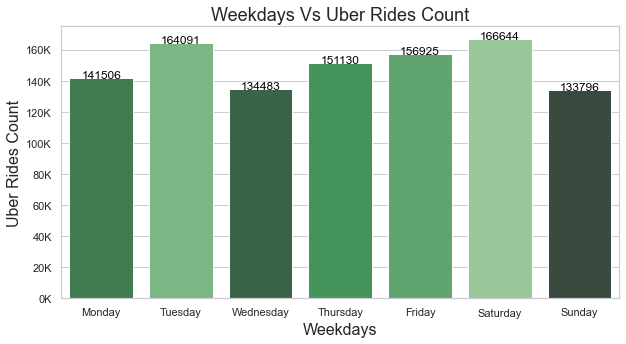

In [54]:

fig, ax = plt.subplots(figsize=(10, 5)) 
pal = sns.color_palette("Greens_d", len(res+3))
rank = res["id"].argsort().argsort() 
g=sns.barplot(x=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],y='id',data=res, palette=np.array(pal[::-1])[rank])
g.set_title('Weekdays Vs Uber Rides Count',size=18)
g.set_ylabel('Uber Rides Count',size=16)
g.set_xlabel('Weekdays',size=16)
ylabels = ['{:,.0f}'.format(y) + 'K' for y in g.get_yticks()/1000]
g.set_yticklabels(ylabels)
for index, row in res.iterrows():
    g.text(row.name,row.id, round(row.id,2), color='black', ha="center")

plt.show()

### Insight: Weekends are usually busy in every city,as people usually go out to meet their friends & Families.

In [55]:
byDate = df1.groupby('Weekday')['id'].count() #365 complete entries
byDate

Weekday
0    141506
1    164091
2    134483
3    151130
4    156925
5    166644
6    133796
Name: id, dtype: int64

In [56]:
c2=df1.groupby('Hour')['id'].count()

In [57]:
res2=c2.reset_index()

In [58]:
res2

,Hour,id
0,0,48610
1,1,34045
2,2,22242
3,3,14653
4,4,10986
5,5,11556
6,6,14769
7,7,24370
8,8,37199
9,9,45049


In [59]:
import matplotlib.dates as mdates

Text(0.5, 0, 'Hours')

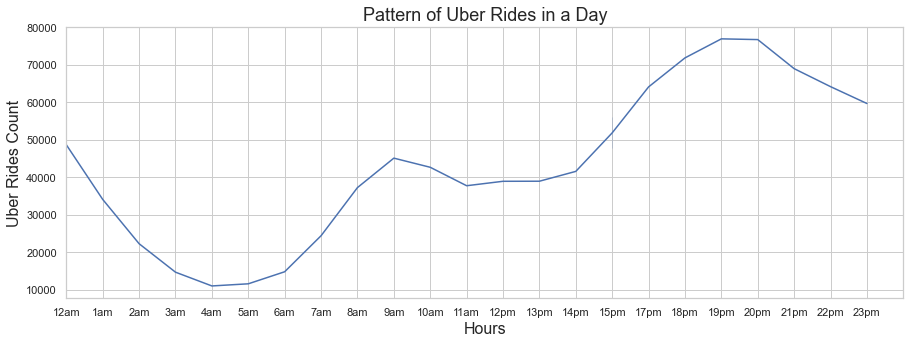

In [60]:
%matplotlib inline 
fig, ax = plt.subplots(figsize=(15, 5))
chart=sns.lineplot(data=res2, x=['12am','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','13pm',
                                 '14pm','15pm','15pm','17pm','18pm','19pm','20pm','21pm','22pm','23pm'],y="id")
locator = mdates.DayLocator(interval=1)
chart.xaxis.set_major_locator(locator)
chart.set(xlim = (0,23))
chart.set_title('Pattern of Uber Rides in a Day',size=18)
chart.set_ylabel('Uber Rides Count',size=16)
chart.set_xlabel('Hours',size=16)


### Insight: Uber ride count is hight 7pm & 8pm as most of the people leaves their offices around that time on weekdays & usally go out on weekends around that time

In [61]:

df1

,id,origin_taz,destination_taz,trip_distance,trip_duration,Date_Time,Day,Weekday,Hour,Avg_trip_speed_mph,Peak_OffPeak
0,252581,7C,6A,4.25,15.183333,2014-09-01 09:00:00,1,0,9,16.794731,1
1,252582,7B,15,10.17,34.083333,2014-09-01 18:00:00,1,0,18,17.903178,1
2,252583,11,2A,4.02,17.100000,2014-09-01 17:00:00,1,0,17,14.105263,1
3,252584,3B,4A,1.46,6.533333,2014-09-01 13:00:00,1,0,13,13.408163,0
4,252585,2A,10,8.31,26.283333,2014-09-01 14:00:00,1,0,14,18.970197,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,21539424,4C,4A,1.75,10.933333,2014-09-30 21:00:00,30,1,21,9.603659,0
1048571,21539434,8,5A,8.86,21.016667,2014-09-30 23:00:00,30,1,23,25.294211,0
1048572,21539437,2A,10,5.98,23.600000,2014-09-30 21:00:00,30,1,21,15.203390,0
1048573,21539446,2A,4A,1.04,5.800000,2014-09-30 22:00:00,30,1,22,10.758621,0


In [62]:
c3=df1.groupby('Day')['id'].count().reset_index()

In [63]:
c3

,Day,id
0,1,22276
1,2,29133
2,3,32554
3,4,37565
4,5,41805
5,6,41604
6,7,34451
7,8,31053
8,9,34708
9,10,36136


Text(0.5, 0, 'Days of September')

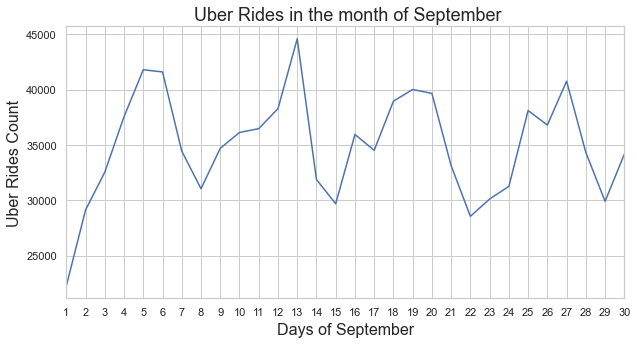

In [64]:
%matplotlib inline 
fig, ax = plt.subplots(figsize=(10, 5))
chart=sns.lineplot(data=c3, x='Day',y="id")
locator = mdates.DayLocator(interval=1)
chart.xaxis.set_major_locator(locator)
chart.set(xlim = (1,30))
chart.set_title(' Uber Rides in the month of September',size=18)
chart.set_ylabel('Uber Rides Count',size=16)
chart.set_xlabel('Days of September',size=16)


#11th annual Wild Rice Festival on 13 sept
#Baseball match

### Insight: Ride count is highest on 13 sept because of a  Baseball match & 11th annual Wild Rice Festival

In [66]:
df1

,id,origin_taz,destination_taz,trip_distance,trip_duration,Date_Time,Day,Weekday,Hour,Avg_trip_speed_mph,Peak_OffPeak
0,252581,7C,6A,4.25,15.183333,2014-09-01 09:00:00,1,0,9,16.794731,1
1,252582,7B,15,10.17,34.083333,2014-09-01 18:00:00,1,0,18,17.903178,1
2,252583,11,2A,4.02,17.100000,2014-09-01 17:00:00,1,0,17,14.105263,1
3,252584,3B,4A,1.46,6.533333,2014-09-01 13:00:00,1,0,13,13.408163,0
4,252585,2A,10,8.31,26.283333,2014-09-01 14:00:00,1,0,14,18.970197,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,21539424,4C,4A,1.75,10.933333,2014-09-30 21:00:00,30,1,21,9.603659,0
1048571,21539434,8,5A,8.86,21.016667,2014-09-30 23:00:00,30,1,23,25.294211,0
1048572,21539437,2A,10,5.98,23.600000,2014-09-30 21:00:00,30,1,21,15.203390,0
1048573,21539446,2A,4A,1.04,5.800000,2014-09-30 22:00:00,30,1,22,10.758621,0


In [67]:
c4=df1.groupby('Hour')['Avg_trip_speed_mph'].median().reset_index()

In [68]:
#c4.values.round(1)

In [69]:
#c4

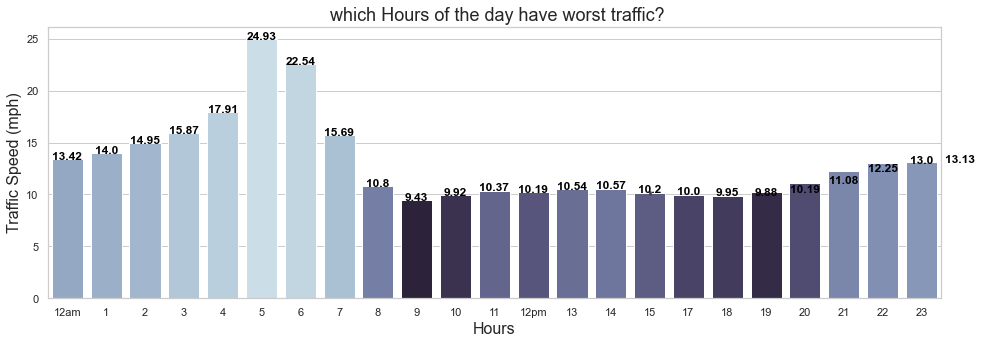

In [70]:
fig, ax = plt.subplots(figsize=(16, 5)) 


pal = sns.color_palette("ch:s=.25,rot=-.25", len(c4+3))
rank = c4["Avg_trip_speed_mph"].argsort().argsort() 
g=sns.barplot(x=['12am','1','2','3','4','5','6','7','8','9','10','11','12pm','13',
                 '14','15','15','17','18','19','20','21','22','23'],y='Avg_trip_speed_mph',data=c4, palette=np.array(pal[::-1])[rank])

g.set_title(' which Hours of the day have worst traffic?',size=18)
g.set_ylabel('Traffic Speed (mph)',size=16)
g.set_xlabel('Hours',size=16)

for index, row in c4.iterrows():
    g.text(row.name,row.Avg_trip_speed_mph, round(row.Avg_trip_speed_mph,2), color='black', ha="center",weight='bold')


plt.show()

 ### Insight: Uber rides face maximum traffic at around 9am, 5pm & 6pm because of the timing of schools and offices.

In [71]:
c5=df1.groupby('Weekday')['Avg_trip_speed_mph'].median().reset_index()

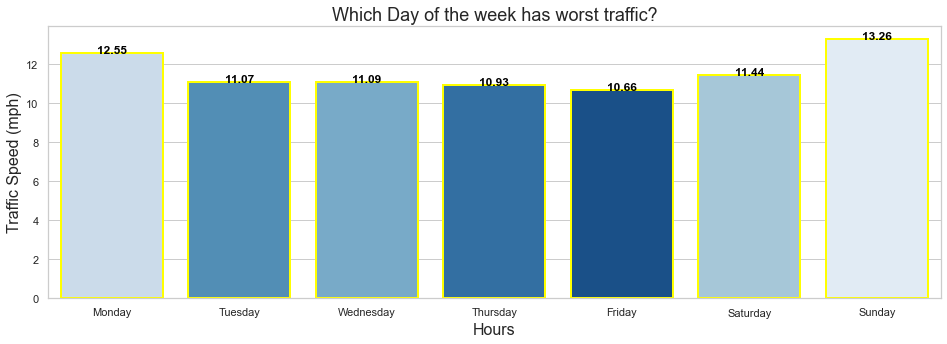

In [72]:
fig, ax = plt.subplots(figsize=(16, 5)) 


pal = sns.color_palette("Blues", len(c5+3))
rank = c5["Avg_trip_speed_mph"].argsort().argsort() 
g=sns.barplot(x= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],y='Avg_trip_speed_mph',
              data=c5, palette=np.array(pal[::-1])[rank],edgecolor='yellow', linewidth=2)

g.set_title('Which Day of the week has worst traffic?',size=18)
g.set_ylabel('Traffic Speed (mph)',size=16)
g.set_xlabel('Hours',size=16)

for index, row in c5.iterrows():
    g.text(row.name,row.Avg_trip_speed_mph, round(row.Avg_trip_speed_mph,2), color='black', ha="center",weight='bold')


plt.show()

### Insight: Fridays are supposed to be start of weekends, people usually go out

In [73]:
df1

,id,origin_taz,destination_taz,trip_distance,trip_duration,Date_Time,Day,Weekday,Hour,Avg_trip_speed_mph,Peak_OffPeak
0,252581,7C,6A,4.25,15.183333,2014-09-01 09:00:00,1,0,9,16.794731,1
1,252582,7B,15,10.17,34.083333,2014-09-01 18:00:00,1,0,18,17.903178,1
2,252583,11,2A,4.02,17.100000,2014-09-01 17:00:00,1,0,17,14.105263,1
3,252584,3B,4A,1.46,6.533333,2014-09-01 13:00:00,1,0,13,13.408163,0
4,252585,2A,10,8.31,26.283333,2014-09-01 14:00:00,1,0,14,18.970197,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,21539424,4C,4A,1.75,10.933333,2014-09-30 21:00:00,30,1,21,9.603659,0
1048571,21539434,8,5A,8.86,21.016667,2014-09-30 23:00:00,30,1,23,25.294211,0
1048572,21539437,2A,10,5.98,23.600000,2014-09-30 21:00:00,30,1,21,15.203390,0
1048573,21539446,2A,4A,1.04,5.800000,2014-09-30 22:00:00,30,1,22,10.758621,0


In [74]:
c6=df1[(df1.Weekday >= 5)].groupby('Hour')['trip_distance'].median().reset_index()
c7=df1[(df1.Weekday < 5)].groupby('Hour')['trip_distance'].median().reset_index()

In [75]:
c6

,Hour,trip_distance
0,0,3.140
1,1,3.260
2,2,3.520
3,3,3.860
4,4,4.350
5,5,5.300
6,6,6.880
7,7,7.670
8,8,5.810
9,9,4.510


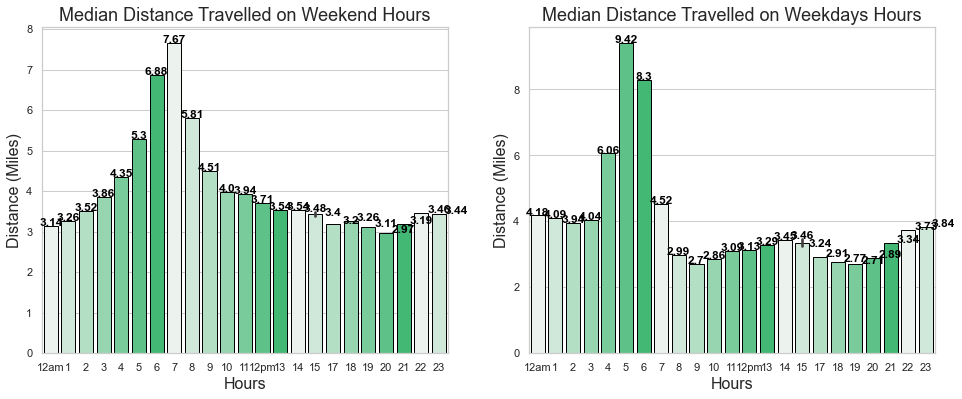

In [76]:
fig, ax = plt.subplots(figsize=(16, 6)) 

plt.subplot(1,2,1)
pal = sns.light_palette("#2ecc71", len(res+3))
rank = c6["trip_distance"].argsort().argsort() 
g=sns.barplot(x= ['12am','1','2','3','4','5','6','7','8','9','10','11','12pm','13',
                 '14','15','15','17','18','19','20','21','22','23'],y='trip_distance',
              data=c6, palette=pal,edgecolor='black', linewidth=1)

g.set_title('Median Distance Travelled on Weekend Hours',size=18)
g.set_ylabel('Distance (Miles)',size=16)
g.set_xlabel('Hours',size=16)

for index, row in c6.iterrows():
    g.text(row.name,row.trip_distance, round(row.trip_distance,2), color='black', ha="center",weight='bold')

    
plt.subplot(1,2,2)
pal = sns.light_palette("#2ecc71", len(res+3))
rank = c7["trip_distance"].argsort().argsort() 
g=sns.barplot(x= ['12am','1','2','3','4','5','6','7','8','9','10','11','12pm','13',
                 '14','15','15','17','18','19','20','21','22','23'],y='trip_distance',
              data=c7, palette=pal,edgecolor='black', linewidth=1)

g.set_title('Median Distance Travelled on Weekdays Hours',size=18)
g.set_ylabel('Distance (Miles)',size=16)
g.set_xlabel('Hours',size=16)

for index, row in c7.iterrows():
    g.text(row.name,row.trip_distance, round(row.trip_distance,2), color='black', ha="center",weight='bold')   


plt.show()

In [78]:
c8=df1[(df1.Weekday >= 5)].groupby('Weekday')['id'].count().reset_index()
c9=df1[(df1.Weekday < 5)].groupby('Weekday')['id'].count().reset_index()

In [79]:
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [81]:
from matplotlib.patches import Ellipse

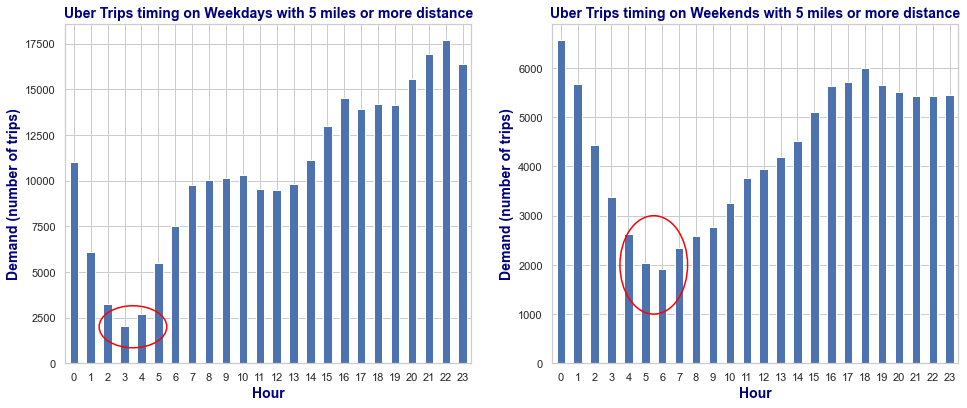

In [82]:
fig = plt.figure(figsize = (16,15))

plt.subplot(2,2,1)
ax1 = df1[(df1.Weekday < 5) & (df1.trip_distance >= 5)].\
groupby('Hour')['trip_distance'].count().plot(kind='bar', rot = 0)

ellipse = Ellipse(xy=(3.5, 2000), width=4, height=2300, edgecolor='red', fc='None', lw=1.5)
ax1.add_patch(ellipse)
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.ylabel('Demand (number of trips)', fontsize=14, weight='bold', color='navy')
#plt.ylim(0, 1400000)
plt.title('Uber Trips timing on Weekdays with 5 miles or more distance', fontsize=14, weight='bold', color='navy')


plt.subplot(2,2,2)
ax1 = df1[(df1.Weekday >= 5) & (df1.trip_distance >= 5)].\
groupby('Hour')['trip_distance'].count().plot(kind='bar', rot = 0)

ellipse = Ellipse(xy=(5.5, 2000), width=4, height=2000, edgecolor='red', fc='None', lw=1.5)
ax1.add_patch(ellipse)
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.ylabel('Demand (number of trips)', fontsize=14, weight='bold', color='navy')
#plt.ylim(0, 1400000)
plt.title('Uber Trips timing on Weekends with 5 miles or more distance', fontsize=14, weight='bold', color='navy')

fig.subplots_adjust(hspace=0.4)
plt.show()

fig.subplots_adjust(hspace=0.4)
plt.show()

### Insight: Around 1-5 am on weekdays & 4-7am on weekends Uber drivers can take off without missing any major ride

In [83]:
df1

,id,origin_taz,destination_taz,trip_distance,trip_duration,Date_Time,Day,Weekday,Hour,Avg_trip_speed_mph,Peak_OffPeak
0,252581,7C,6A,4.25,15.183333,2014-09-01 09:00:00,1,0,9,16.794731,1
1,252582,7B,15,10.17,34.083333,2014-09-01 18:00:00,1,0,18,17.903178,1
2,252583,11,2A,4.02,17.100000,2014-09-01 17:00:00,1,0,17,14.105263,1
3,252584,3B,4A,1.46,6.533333,2014-09-01 13:00:00,1,0,13,13.408163,0
4,252585,2A,10,8.31,26.283333,2014-09-01 14:00:00,1,0,14,18.970197,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,21539424,4C,4A,1.75,10.933333,2014-09-30 21:00:00,30,1,21,9.603659,0
1048571,21539434,8,5A,8.86,21.016667,2014-09-30 23:00:00,30,1,23,25.294211,0
1048572,21539437,2A,10,5.98,23.600000,2014-09-30 21:00:00,30,1,21,15.203390,0
1048573,21539446,2A,4A,1.04,5.800000,2014-09-30 22:00:00,30,1,22,10.758621,0


In [84]:
c10=df1[(df1.Weekday >= 5)].groupby('origin_taz')['id'].count().nlargest(10).reset_index()
c12=df1[(df1.Weekday < 5)].groupby('origin_taz')['id'].count().nlargest(10).reset_index()

In [85]:
c12

,origin_taz,id
0,2A,133795
1,4C,56981
2,1,53091
3,5C,48327
4,6B,47071
5,15,34215
6,4A,33072
7,10,32635
8,6A,32550
9,11,30654


In [86]:
c11=c10.sort_values('id', ascending=False)
c13=c12.sort_values('id', ascending=False)

In [87]:
c12

,origin_taz,id
0,2A,133795
1,4C,56981
2,1,53091
3,5C,48327
4,6B,47071
5,15,34215
6,4A,33072
7,10,32635
8,6A,32550
9,11,30654


In [88]:
c11 = c11.reset_index(drop=True)
c13 = c13.reset_index(drop=True)

In [89]:
c13

,origin_taz,id
0,2A,133795
1,4C,56981
2,1,53091
3,5C,48327
4,6B,47071
5,15,34215
6,4A,33072
7,10,32635
8,6A,32550
9,11,30654


In [92]:
df1

,id,origin_taz,destination_taz,trip_distance,trip_duration,Date_Time,Day,Weekday,Hour,Avg_trip_speed_mph,Peak_OffPeak
0,252581,7C,6A,4.25,15.183333,2014-09-01 09:00:00,1,0,9,16.794731,1
1,252582,7B,15,10.17,34.083333,2014-09-01 18:00:00,1,0,18,17.903178,1
2,252583,11,2A,4.02,17.100000,2014-09-01 17:00:00,1,0,17,14.105263,1
3,252584,3B,4A,1.46,6.533333,2014-09-01 13:00:00,1,0,13,13.408163,0
4,252585,2A,10,8.31,26.283333,2014-09-01 14:00:00,1,0,14,18.970197,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,21539424,4C,4A,1.75,10.933333,2014-09-30 21:00:00,30,1,21,9.603659,0
1048571,21539434,8,5A,8.86,21.016667,2014-09-30 23:00:00,30,1,23,25.294211,0
1048572,21539437,2A,10,5.98,23.600000,2014-09-30 21:00:00,30,1,21,15.203390,0
1048573,21539446,2A,4A,1.04,5.800000,2014-09-30 22:00:00,30,1,22,10.758621,0


In [93]:
c14=df1[(df1.Weekday >= 5)].groupby('destination_taz')['id'].count().nlargest(10).reset_index()
c15=df1[(df1.Weekday < 5)].groupby('destination_taz')['id'].count().nlargest(10).reset_index()

In [94]:
c14

,destination_taz,id
0,2A,70320
1,15,20040
2,11,17391
3,10,16567
4,1,16292
5,4C,15322
6,6B,14991
7,4A,12216
8,6A,11584
9,5C,10013


In [95]:
c15

,destination_taz,id
0,2A,150454
1,4C,51562
2,1,45962
3,6B,44620
4,5C,39179
5,15,37330
6,10,33363
7,4A,33086
8,6A,30794
9,11,28846


In [96]:
c16 = c14.reset_index(drop=True)
c17 = c15.reset_index(drop=True)

In [97]:
c16

,destination_taz,id
0,2A,70320
1,15,20040
2,11,17391
3,10,16567
4,1,16292
5,4C,15322
6,6B,14991
7,4A,12216
8,6A,11584
9,5C,10013


In [99]:
df1.head(2)

,id,origin_taz,destination_taz,trip_distance,trip_duration,Date_Time,Day,Weekday,Hour,Avg_trip_speed_mph,Peak_OffPeak
0,252581,7C,6A,4.25,15.183333,2014-09-01 09:00:00,1,0,9,16.794731,1
1,252582,7B,15,10.17,34.083333,2014-09-01 18:00:00,1,0,18,17.903178,1


In [100]:
c18=df1[(df1.Weekday >= 5)]

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

<ipython-input-104-7d19d4cad57e>:11: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



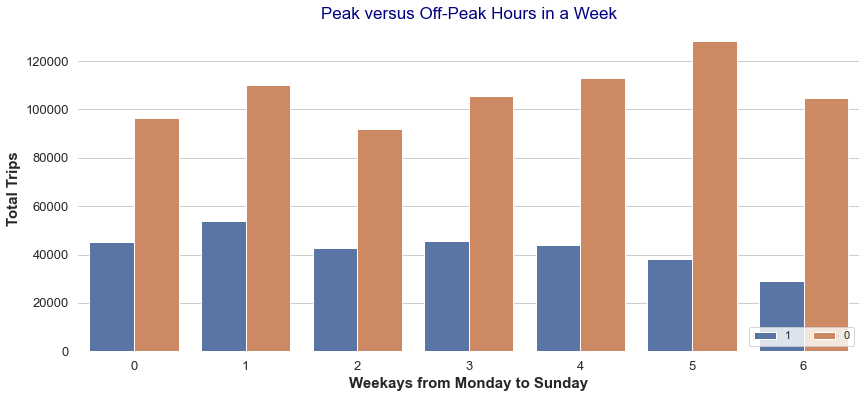

In [104]:
#Plot the total number of trips per month during peak hours and off-peak hours.
#Count for peak hours must represent more than 25% (6h) of the total rides to be more significant than non-peak hours.
plt.figure(figsize = (14, 6))

#to add labels and operate on data, use pivot instead of countplot directly with hue.
ax = sns.countplot(df1['Weekday'], hue = df1['Peak_OffPeak'],orient = 'h')



handles, labels = ax.get_legend_handles_labels() #will cause the warning msg that can be ignored 
plt.legend(handles, labels=['Peak', 'Off Peak'], loc='best', fontsize=13)
plt.tick_params(labelsize=13)
plt.xlabel('Weekays from Monday to Sunday', fontsize = 15, weight='bold')
plt.ylabel('Total Trips', fontsize = 15, weight='bold')
plt.title('Peak versus Off-Peak Hours in a Week', fontsize = 17, color='navy')

ax.legend(ncol=2, loc="lower right", frameon=True)

sns.despine(left=True, bottom=True)

plt.show()

### Peak Hours are: 7am,8am,9am,4pm,5pm & 6m
### On Mondays Peak hour rides are the highest, and on Saturdays Off-Peak Hour rides are highest.

In [102]:
df1[(df1.Weekday >= 5) | (df1.Peak_OffPeak == 1)]

,id,origin_taz,destination_taz,trip_distance,trip_duration,Date_Time,Day,Weekday,Hour,Avg_trip_speed_mph,Peak_OffPeak
3412,255993,6B,5C,0.47,2.566667,2014-09-06 19:00:00,6,5,19,10.987013,0
3413,255994,1,4C,5.60,26.933333,2014-09-06 11:00:00,6,5,11,12.475248,0
3414,255995,15,1,4.52,24.350000,2014-09-06 20:00:00,6,5,20,11.137577,0
3415,255996,2A,12,6.50,20.516667,2014-09-06 03:00:00,6,5,3,19.008936,0
3416,255997,5A,2A,2.75,21.033333,2014-09-06 16:00:00,6,5,16,7.844691,1
...,...,...,...,...,...,...,...,...,...,...,...
1047740,21538142,7C,2B,9.23,26.266667,2014-09-28 22:00:00,28,6,22,21.083756,0
1047742,21538144,9,8,12.23,30.500000,2014-09-28 22:00:00,28,6,22,24.059016,0
1047746,21538148,15,15,4.29,17.300000,2014-09-28 22:00:00,28,6,22,14.878613,0
1047752,21538154,6A,7C,3.76,16.250000,2014-09-28 21:00:00,28,6,21,13.883077,0


<ipython-input-119-8800dde6e379>:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-119-8800dde6e379>:29: UserWarning:

FixedFormatter should only be used together with FixedLocator



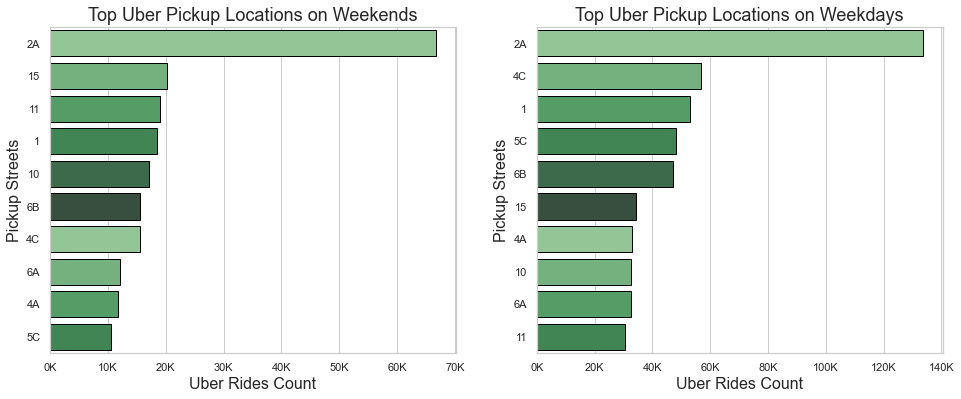

In [119]:
fig, ax = plt.subplots(figsize=(16, 6)) 

plt.subplot(1,2,1)
pal = sns.color_palette("Greens_d")
rank = c11["origin_taz"].argsort().argsort() 
g=sns.barplot(x='id',y='origin_taz',
              data=c11, palette=pal,edgecolor='black', linewidth=1)

g.set_title('Top Uber Pickup Locations on Weekends',size=18)
g.set_xlabel('Uber Rides Count',size=16)
g.set_ylabel('Pickup Streets',size=16)

xlabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
g.set_xticklabels(xlabels) 


    
plt.subplot(1,2,2)
pal = sns.color_palette("Greens_d")
rank = c13["origin_taz"].argsort().argsort() 
g=sns.barplot(x='id' ,y='origin_taz',
              data=c13, palette=pal,edgecolor='black', linewidth=1)

g.set_title('Top Uber Pickup Locations on Weekdays',size=18)
g.set_ylabel('Pickup Streets',size=16)
g.set_xlabel('Uber Rides Count',size=16)

xlabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
g.set_xticklabels(xlabels) 


plt.show()

### Insight: 2A is common in both as it is a commercial area.

<ipython-input-120-3c4aec82804c>:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-120-3c4aec82804c>:29: UserWarning:

FixedFormatter should only be used together with FixedLocator



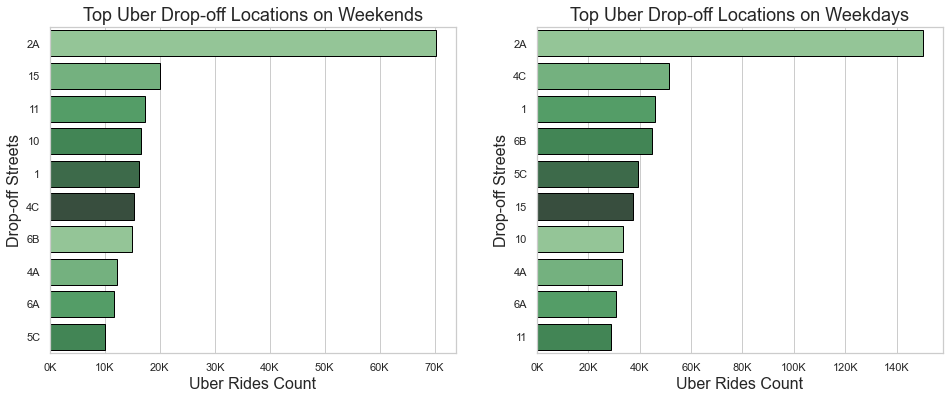

In [120]:
fig, ax = plt.subplots(figsize=(16, 6)) 

plt.subplot(1,2,1)
pal = sns.color_palette("Greens_d")
rank = c16["destination_taz"].argsort().argsort() 
g=sns.barplot(x='id',y='destination_taz',
              data=c16, palette=pal,edgecolor='black', linewidth=1)

g.set_title('Top Uber Drop-off Locations on Weekends',size=18)
g.set_xlabel('Uber Rides Count',size=16)
g.set_ylabel('Drop-off Streets',size=16)

xlabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
g.set_xticklabels(xlabels) 


plt.subplot(1,2,2)
pal = sns.color_palette("Greens_d")
rank = c17["destination_taz"].argsort().argsort() 
g=sns.barplot(x='id' ,y='destination_taz',
              data=c17, palette=pal,edgecolor='black', linewidth=1,orient='h')

g.set_title('Top Uber Drop-off Locations on Weekdays',size=18)
g.set_xlabel('Uber Rides Count',size=16)
g.set_ylabel('Drop-off Streets',size=16)


xlabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
g.set_xticklabels(xlabels) 


plt.show()